# 📊 Customer Segmentation using K-Means Clustering

### Internship Project – Oasis Infobyte (OIBSIP)

This project performs customer segmentation using **K-Means Clustering** to group customers based on their **Annual Income** and **Spending Score**.  
The goal is to help businesses understand customer behavior and design **targeted marketing strategies**.


In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## 📂 Loading the Dataset

The dataset contains customer details such as:
- Customer ID
- Gender
- Age
- Annual Income
- Spending Score

We load the dataset using Pandas and preview the first few rows.


In [3]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape


(200, 5)

In [5]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## Exploratory Data Analysis (EDA)

Here, we explore the dataset to understand its structure, check for missing values, and get a statistical summary of the data.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.duplicated().sum()


np.int64(0)

## Feature Selection

For customer segmentation, we select the most relevant features:
- **Annual Income (k$)**
- **Spending Score (1–100)**

These features help us understand customer purchasing behavior.


In [10]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]



## Feature Scaling

Since K-Means clustering is distance-based, it is important to scale the features.  
Standardization ensures that all features contribute equally to the clustering process.


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Finding Optimal Number of Clusters (Elbow Method)

The Elbow Method is used to determine the optimal number of clusters.  
WCSS (Within-Cluster Sum of Squares) is calculated for different cluster values, and the point where the decrease slows down is chosen as the optimal number of clusters.



In [13]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


In [14]:
wcss


[399.99999999999994,
 273.66888662642003,
 157.70400815035939,
 109.22822707921345,
 65.56840815571681,
 60.132874871934206,
 49.668244837367965,
 37.31912287833882,
 32.495081199100916,
 30.05932269404222]

## Elbow Curve Visualization

The elbow curve helps visually identify the optimal number of clusters for K-Means clustering.



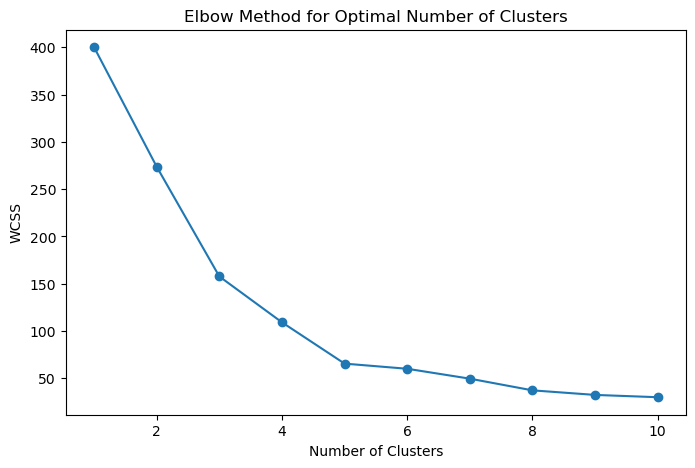

In [15]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


##  Elbow Method Analysis

The Elbow Method was used to determine the optimal number of clusters.
From the plot, the WCSS value decreases sharply until **K = 5**, after which the decrease becomes gradual.
Hence, **5 clusters** were chosen as the optimal number for customer segmentation.


In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


## Visualizing Customer Segments

The scatter plot visualizes different customer segments based on Annual Income and Spending Score.  
Each color represents a distinct customer cluster.


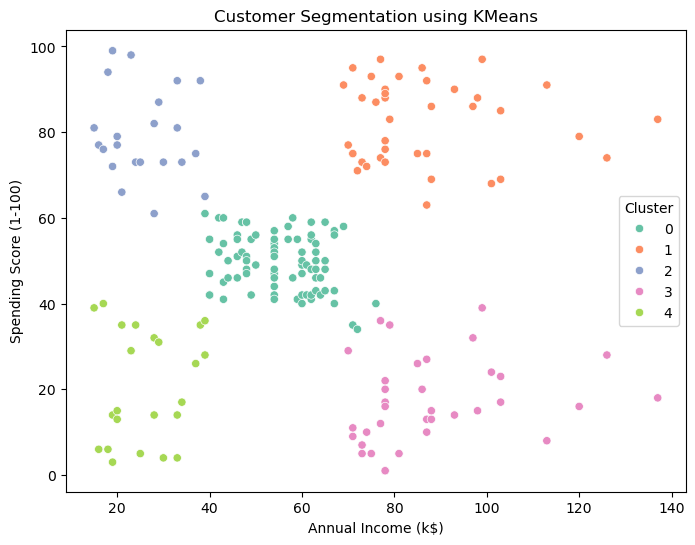

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='Set2'
)
plt.title('Customer Segmentation using KMeans')
plt.show()


In [20]:
df['Cluster'].value_counts()

Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

## Cluster-wise Customer Analysis

We calculate the average Annual Income and Spending Score for each cluster to better understand customer behavior in each segment.


In [23]:
df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


## 🧩 Cluster Interpretation

- **Cluster 0**: Customers with moderate income and moderate spending.
- **Cluster 1**: High income and high spending customers (premium customers).
- **Cluster 2**: Low income but high spending customers (impulsive buyers).
- **Cluster 3**: High income but low spending customers (careful spenders).
- **Cluster 4**: Low income and low spending customers.

These clusters help businesses design targeted marketing strategies for different customer groups.



## 📊 Business Insights

- High income & high spending customers can be targeted with premium products.
- Low spending customers may need discounts or loyalty offers.
- Understanding customer segments helps improve marketing efficiency and customer satisfaction.
